## 3조

### 분류모델 및 하이퍼파라미터 [50점]

Q1. 로지스틱 회귀가 이진 분류에서 확률을 출력하기 위해 사용하는 함수를 작성하시오. (단답형) [5점]

답 : 시그모이드함수

Q2. 다음 중 분류모델에 대해 올바르지 않은 것을 고르시오.[5점]

1. K-최근접 이웃 알고리즘은 입력 특성의 스케일 차에 민감하게 반응한다.
2. 엔트로피가 높을수록, 지수계수가 낮을수록 데이터의 균일도가 높다.
3. 랜덤 포레스트는 여러 약한 학습기의 결과를 결합하는 배깅 기법을 활용한다.
4. 결정트리는 표준화와 같은 전처리 작업이 필요 없다.



답 : 2

Q3. 다음은 결정트리의 주요 파라미터에 대한 설명입니다. 빈칸을 채워주세요.[5점]


1. max_depth : 트리의 최대 깊이를 규정하는 파라미터로, 값이 작을수록 트리가 덜 세분화되고 과적합을 방지합니다.
2.  min_samples_split: 노드를 분할하기 위한 최소한의 샘플 데이터 수를 지정하는 파라미터로 작게 설정할수록 분할되는 노드가 많아져 과적합 가능성이 증가합니다.
3. max_features : 최적 분할을 위해 고려할 최대 피처 개수로, 낮아질수록 간단한 모델이 생성됩니다.



Q4. 다음은 하이퍼파라미터 튜닝에 관련된 설명으로 올바르지 않은 것을 고르시오.[5점]



1.   하이퍼파라미터란 사용자가 설정하는 값으로, 학습률/손실함수/배치사이즈 등이 있다.
2.   Grid Search(그리드 서치)는 가능한 모든 조합의 하이퍼파라미터로 훈련시켜 최적 조합을 찾는 방식이다.
3. Random Search(랜덤 서치)는 하이퍼파라미터 값 범위 내에서 무작위로 선택해 최적의 파라미터를 찾는 방식이다.
4. Manual Search(매뉴얼 서치)는 미지의 목적함수를 최대화(또는 최소화)하는 최적해를 찾는 기법이다.



답 :4

Q5. XGBoost와 LightGBM의 차이점에 대해 간략히 서술하시오.[5점]

답 : XGBoost는 주로 수직적으로(레벨별) 노드를 확장하는 방식으로 트리를 성장시키고 LightGBM은 주로 수평적으로(리프별) 노드를 확장하는 방식으로 트리를 성장시키며, 리프 중심 트리 성장 방식을 채택하여 더 깊은 트리를 생성할 수 있습니다.

Q6-10. 다음은 위스코신 유방암 데이터 세트를 활용하여 예측하는 코드입니다. 차례로 실행시키고, 빈칸이 있으면 채워주세요. [25점]

In [1]:
# 실행시켜주세요
import xgboost as xgb
from xgboost import plot_importance
import pandas as pd
import numpy as np
from hyperopt import hp
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
import warnings
warnings.filterwarnings('ignore')

dataset = load_breast_cancer()
features = dataset.data
labels = dataset.target

XGBoostError: 
XGBoost Library (libxgboost.dylib) could not be loaded.
Likely causes:
  * OpenMP runtime is not installed
    - vcomp140.dll or libgomp-1.dll for Windows
    - libomp.dylib for Mac OSX
    - libgomp.so for Linux and other UNIX-like OSes
    Mac OSX users: Run `brew install libomp` to install OpenMP runtime.

  * You are running 32-bit Python on a 64-bit OS

Error message(s): ["dlopen(/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/lib/libxgboost.dylib, 0x0006): Library not loaded: @rpath/libomp.dylib\n  Referenced from: <B9202094-7D52-318C-99CF-7034B0E9F28D> /Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/lib/libxgboost.dylib\n  Reason: tried: '/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file), '/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file)"]


In [ ]:
# 데이터프레임 정의 후, 타켓 레이블 값의 분포를 확인하는 코드입니다
# 실행시켜주세요
cancer_df = pd.DataFrame(data=features, columns=dataset.feature_names)
cancer_df['target'] = labels
print(cancer_df['target'].value_counts())

target
1    357
0    212
Name: count, dtype: int64


In [ ]:
# 데이터셋을 train:test = 8:2로 나눈 뒤, train의 10%를 valid로 사용하는 코드입니다.

X_features = cancer_df.iloc[:, :-1]
y_label = cancer_df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X_features, y_label, test_size = '???', random_state = 42)
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size = '???', random_state = 42)

dtr = xgb.DMatrix(data = X_tr , label=y_tr)
dval = xgb.DMatrix(data=X_val, label=y_val)
dtest = xgb.DMatrix(data=X_test, label=y_test)

In [ ]:
# XGBoost 를 이용해 학습을 수행하기 전 하이퍼 파라미터를 설정하는 코드입니다.
# 최대 깊이는 3, 학습률은 0.1, 목적합수는 이진로지스틱(binary:logistic), 오류함수의 성능평가지표는 logloss, 부스팅 반복횟수는 50회로 설정해주세요.

params = {'???': 3,
          '???' : 0.1,
          '???':'???',
          '???': 'logloss'}

'???' = 50

In [ ]:
# 앞서 설정된 하이퍼파라미터로 훈련데이터를 학습시키는 코드입니다. 빈칸을 채워주세요
eval_list = [(dtr, 'train'), (dval, 'eval')]

xgb_model = '???'(params = params, dtrain=dtr, num_boost_round=num_boost_round,
                      early_stopping_rounds = 50, evals = eval_list)

[0]	train-logloss:0.58212	eval-logloss:0.57488
[1]	train-logloss:0.51676	eval-logloss:0.51401
[2]	train-logloss:0.46163	eval-logloss:0.45815
[3]	train-logloss:0.41470	eval-logloss:0.41290
[4]	train-logloss:0.37499	eval-logloss:0.37274
[5]	train-logloss:0.34007	eval-logloss:0.34427
[6]	train-logloss:0.31045	eval-logloss:0.31735
[7]	train-logloss:0.28307	eval-logloss:0.28863
[8]	train-logloss:0.25983	eval-logloss:0.26919
[9]	train-logloss:0.23908	eval-logloss:0.24809
[10]	train-logloss:0.22021	eval-logloss:0.23215
[11]	train-logloss:0.20397	eval-logloss:0.21630
[12]	train-logloss:0.18817	eval-logloss:0.19952
[13]	train-logloss:0.17472	eval-logloss:0.18876
[14]	train-logloss:0.16237	eval-logloss:0.17896
[15]	train-logloss:0.15174	eval-logloss:0.16999
[16]	train-logloss:0.14099	eval-logloss:0.16338
[17]	train-logloss:0.13147	eval-logloss:0.15320
[18]	train-logloss:0.12364	eval-logloss:0.14677
[19]	train-logloss:0.11557	eval-logloss:0.14239
[20]	train-logloss:0.10881	eval-logloss:0.13871
[2

In [ ]:
# 학습 결과값을 통해 예측하는 코드입니다. 빈칸을 채워주세요.

pred_probs = '???'(dtest)
print(np.round(pred_probs[:5], 3))

# 예측확률이 0.5보다 크면 1(양성), 그렇지 않으면 0(음성)으로 출력하는 코드입니다. 빈칸을 채워주세요.
pred = [1
        if '???'
        else '???' for x in pred_probs]

print(pred[:5])

[0.987 0.009 0.012 0.993 0.995]
[1, 0, 0, 1, 1]


## 4조

### Q1. 평가 지표 (30점)

1.1. 빈칸에 들어갈 용어를 순서대로 작성하세요.(3점)

정확도는 예측 결과가 실제 값이 동일한 데이터 건수 / 전체 예측 데이터 건수로
(              )에서 (              )가 얼마나 같은지를 판단하는 지표입니다.

정답:

1.2. 다음은 scikit-learn의 BaseEstimator클래스를 상속받아 성별에 따라 생존자를 예측하는 MyDummyClassifier를 만든 후 이 Classifier를 활용하여 학습/예측/평가를 수행하는 실습 코드입니다. 코드의 빈칸을 완성해 주세요.(3점)

In [ ]:
from sklearn.base import BaseEstimator
import numpy as np

class MyDummyClassifier(BaseEstimator):
    # fit() 메서드는 아무것도 학습하지 않음
    def fit(self, X, y=None):
        ???

    # predict() 메서드는 단순히 Sex 피처가 1이면 0, 그렇지 않으면 1로 예측함.
    def predict(self, X):
        pred = ???((X.shape[0], 1))
        for i in range(X.shape[0]):
            if X['Sex'].iloc[i] == 1:
                pred[i] = 0
            else:
                ???
        return pred

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# 결측값 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(),inplace=True)
    df['Cabin'].???('N',inplace=True)
    df['Embarked'].???('N',inplace=True)
    df['Fare'].fillna(0,inplace=True)
    return df

# 머신러닝 알고리즘에 불필요한 속성 제거
def drop_features(df):
    df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
    return df

# 레이블 인코딩 수행
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin','Sex','Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(???)
    return df

# 앞에서 설정한 Data Preprocessing 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

titanic_df = pd.read_csv('train.csv') # 파일 경로 설정
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis=1)
X_titanic_df = transform_features(X_titanic_df)
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size=0.2, random_state=0)

# 위에서 생성한 MyDummyClassifier로 학습/예측/평가 수행
myclf = MyDummyClassifier()
myclf.???(X_train, y_train) # 모델 학습
mypredictions = myclf.???(X_test) # 예측 수행
print('Dummy Classifier의 정확도는: {0:.4f}'.format(???(y_test, mypredictions))) # 정확도 계산

Dummy Classifier의 정확도는: 0.7877


/var/folders/z6/ftyb5wr90r741j34byrdw5c40000gn/T/ipykernel_9946/2368876941.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(),inplace=True)
/var/folders/z6/ftyb5wr90r741j34byrdw5c40000gn/T/ipykernel_9946/2368876941.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always 

1.3. 다음은 MNIST 데이터셋을 불균형한 데이터셋으로 변환한 후 정확도 지표를 적용하는 실습 코드입니다. 불균형한 MNIST 데이터셋 중 레이블 값이 7인 것만 True, 나머지 값은 모두 False로 변환하고 모든 데이터를 False(0)로 예측하는 Classifier를 이용하여 정확도를 측정합니다. 코드의 빈칸을 완성해 주세요.(3점)

In [ ]:
from sklearn.datasets import load_digits

class MyFakeClassifier(BaseEstimator):
    def fit(self, X, y):
        pass

    # 입력값으로 들어오는 X 데이터 세트의 크기만큼 모두 0값으로 만들어서 반환
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

# 사이킷런의 내장 데이터 세트인 load_digits()를 이용해 MNIST 데이터 로딩
digits = load_digits()

# digits 번호가 7번이면 True이고 이를 astype(int)를 사용해서 1로 변환, 7번이 아니면 False이고 0으로 변환
y = (digits.target==7).astype(int)
X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state=11)

불균형한 데이터로 생성한 y_test의 데이터 분포도를 확인하고 MyFakeClassifier를 이용해 예측과 평가 수행

In [ ]:
# 불균형한 레이블 데이터 분포도 확인
print(f'레이블 테스트 세트 크기: {y_test.shape}')
print(f'테스트 세트 레이블 0과 1의 분포도:\n {pd.Series(y_test).value_counts()}')

# Dummy Classifier로 학습/예측/평가
fakeclf = MyFakeClassifier()
fakeclf.???(X_train, y_train) # 모델 학습
fakepred = fakeclf.???(X_test) # 예측 수행
print('모든 예측을 0으로 하여도 정확도는: {:.3f}'.format(???(y_test, fakepred))) # 정확도 계산

레이블 테스트 세트 크기: (450,)
테스트 세트 레이블 0과 1의 분포도:
 0    405
1     45
Name: count, dtype: int64
모든 예측을 0으로 하여도 정확도는: 0.900


confusion_matrix API를 통해 오차행렬 출력

<Axes: >

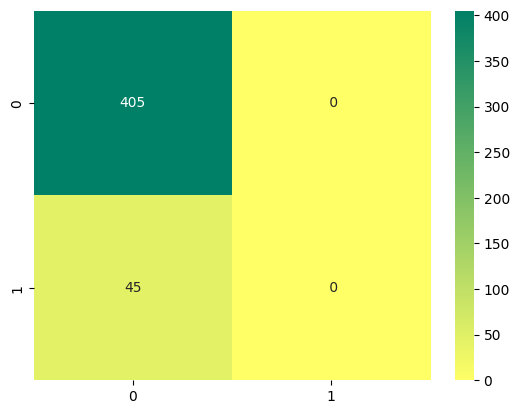

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.heatmap(???(y_test, fakepred), annot=True, fmt='2.0f', cmap='summer_r')

1.4. 1.2번 문제와 1.3번 문제를 바탕으로 정확도를 평가 지표로 사용할 때 신중해야 하는 이유를 서술하세요.(3점)

정답:

1.4. 오차행렬은 아래 이미지와 같은 4분면 행렬에서 실제 레이블 클래스 값과 예측 레이블 클래스 값이 어떠한 유형을 가지고 매핑되는지를 나타냅니다. 아래 이미지를 보고 TN, FP, FN, TP가 각각 무엇을 의미하는지 작성하세요.(3점)

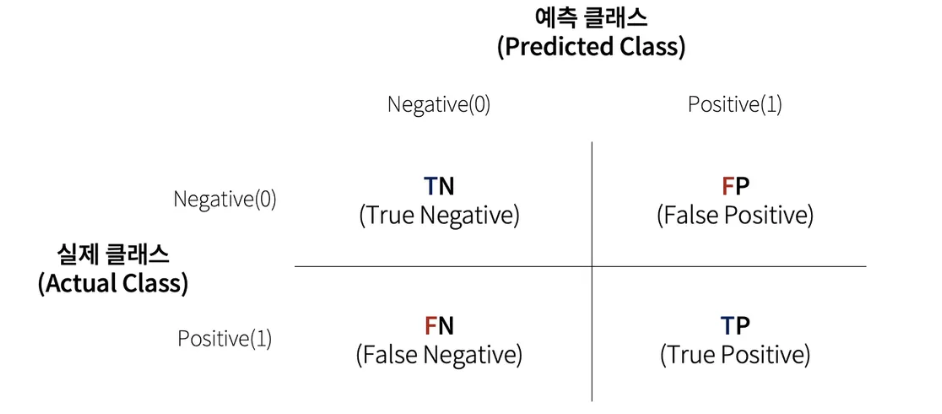

TN:
<br>
FP:
<br>
FN:
<br>
TP:

1.5. 빈칸에 들어갈 용어를 순서대로 작성하세요.(3점)

TP, TN, FP, FN 값으로 Classifier의 성능을 측정할 수 있는 주요 지표인 (              ), (              ), (              ) 값을 알 수 있습니다.

정답:

1.7. 다음 빈칸에 들어갈 용어를 순서대로 작성한 후 해당되는 예시를 간략하게 작성해 주세요.(3점)

정밀도가 상대적으로 더 중요한 지표인 경우는 (              )인 경우이다
<br>
재현율이 상대적으로 더 중요한 지표인 경우는 (              )인 경우이다

정답:

1.8. scikit-learn은 정밀도 계산을 위해 precision_score(), 재현율 계산을 위해 recall_score()를 API로 제공합니다. 다음은 confusion matrix, accuracy, precision, recall 등의 평가를 호출하는 get_clf_eval()함수를 만든 후 타이타닉 데이터를 가공해 로지스틱 회귀로 분류를 수행하는 실습 코드입니다. 코드의 빈칸을 완성해 주세요.(3점)

In [ ]:
from sklearn.metrics import precision_score, recall_score

def get_clf_eval(y_test, pred):
    confusion = ???(y_test, pred)
    accuracy = ???(y_test, pred)
    precision = ???(y_test, pred)
    recall = ???(y_test, pred)
    # seaborn의 heatmap 사용
    sns.heatmap(confusion, annot=True, fmt='2.0f', cmap='summer_r')
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}'.format(accuracy, precision, recall))

정확도: 0.8492, 정밀도: 0.7742, 재현율: 0.7869


/var/folders/z6/ftyb5wr90r741j34byrdw5c40000gn/T/ipykernel_9946/1435925988.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(),inplace=True)
/var/folders/z6/ftyb5wr90r741j34byrdw5c40000gn/T/ipykernel_9946/1435925988.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always 

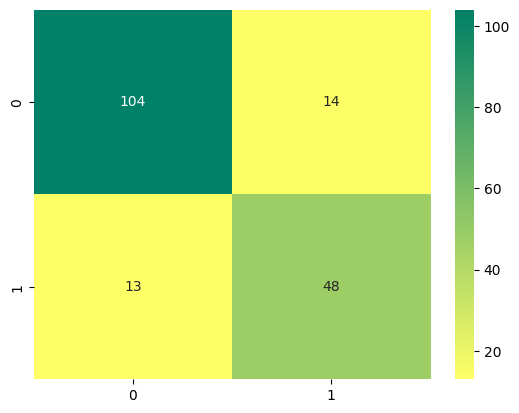

In [ ]:
from sklearn.linear_model import LogisticRegression

titanic_df = pd.read_csv('train.csv') # 파일 경로 설정
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis=1)
X_titanic_df = ???(X_titanic_df)

X_train, X_test, y_train, y_test = ???(X_titanic_df, y_titanic_df, test_size=0.20, random_state=11)

lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
get_clf_eval(???, pred)

1.9. 빈칸에 들어갈 용어를 순서대로 작성하세요.(3점)

F1 스코어는 (              )와 (              )을 결합한 지표입니다. F1 스코어는 (              )와 (              )이 어느 한 쪽으로 치우치지 않는 수치를 나타낼 때 상대적으로 높은 값을 가집니다.

정답:

1.10. 아래 그래프를 참고하여 빈칸에 들어갈 용어를 순서대로 작성하세요.(3점)

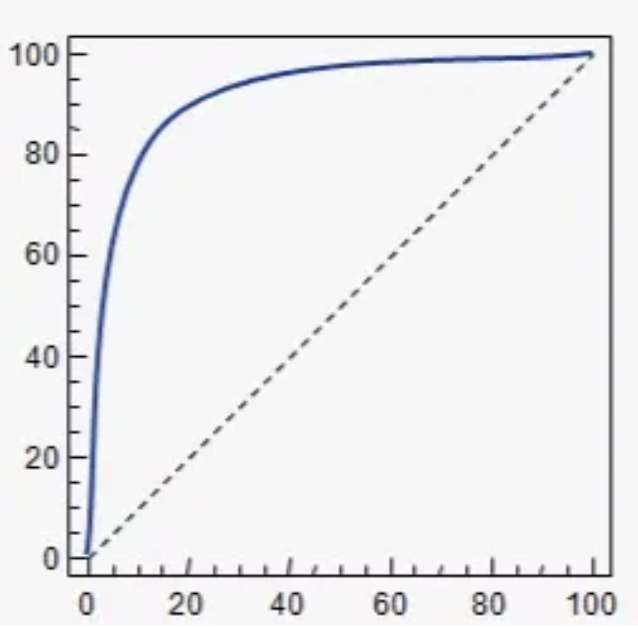

ROC 곡선과 이에 기반한 AUC 스코어는 (       A       )의 예측 성능 측정에서 중요하게 사용되는 지표입니다. ROC 곡선은 (       B       )이/가 변할 때 (       C       )이/가 어떻게 변하는지를 나타내는 곡선입니다. (       B       )을/를 X축으로, (       C       )을/를 Y축으로 잡으면 (       B       )의 변화에 따른 (       C       )의 변화가 곡선 형태로 나타납니다.

A:
<br>
B:
<br>
C:

### Q2. 과적합 (20점)

2.1. 과소적합(under-fitting)과 과대적합(over-fitting)의 차이점을 설명하고, 각각의 경우 모델의 성능이 학습 데이터와 테스트 데이터에서 어떻게 나타날지 서술하세요.(3점)

정답:

2.2. 아래 그래프를 참고하여 다음 질문에 답해주세요.(9점, 각각 3점)

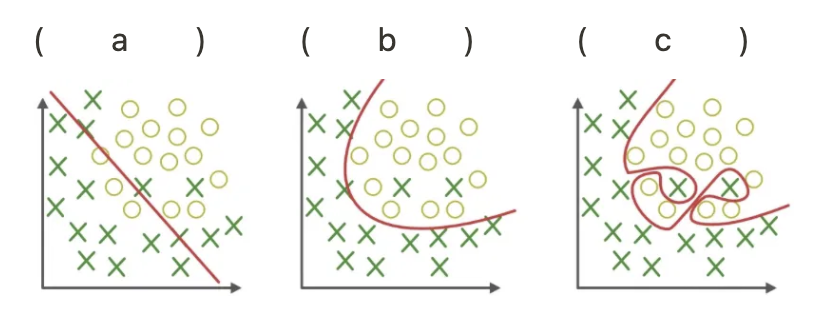

a, b, c 그래프는 under-fitting, appropriate-fitting, over-fitting 중 각각 어떤 것에 해당하는지 작성하고 under-fitting, appropriate-fitting, over-fitting에 대해 서술하세요.(3점)

정답:

과대적합이 발생하는 시점을 그래프에서 어떻게 식별할 수 있는지 서술하세요.(3점)

정답:

과대적합을 방지하기 위한 방법을 두 가지 제시하고, 각각이 어떻게 과적합 문제를 해결할 수 있는지 서술하세요.(3점)

정답:

2.3. K-폴드 교차 검증의 과정을 간단히 서술하고, K값 선택이 모델 평가에 미치는 영향에 대해 작성해 주세요.(3점)

정답:

2.4. K-폴드 교차 검증에서 K값을 증가시키면 어떤 영향이 있는지 서술하세요.(3점)

정답:

2.5. 다음 중 과적합을 방지하기 위한 방법이 아닌 것을 골라주세요.(2점)

a. 정규화 (Regularization)
<br>
b. 드롭아웃 (Dropout)
<br>
c. 데이터 증강 (Data Augmentation)
<br>
d. 학습률 증가 (Increasing Learning Rate)

정답: